# Summary Evaluation over different experimental hyperparameter combinaitons

# 0. Load pre-processed evaluation results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# remove waringns
import warnings
warnings.filterwarnings("ignore")

from utils_evaluation import barplot_coloured_by_parameter, barplot_one_var

In [2]:
# set model 
model = 'xgb'

if model == 'rf':
    model_name = 'Random Forest'
elif model == 'xgb':
    model_name = 'XGBoost'
else:
    raise ValueError('model not supported')
    
# load csv
df = pd.read_csv('/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/Evaluation/tables/' + model +'/results_per_parameter.csv')

experimental_parameters = ['param_model', 'param_transformation',  'param_n_train', 'param_group_size', 'param_noise']

# split parameter_combination_string into separate columns
for i, param in enumerate(experimental_parameters):
    df[param] = df['parameter_combination_string'].str.split('_').str[i]
    
# convert numeric columns to integer type
numeric_columns = ['param_n_train', 'param_group_size', 'param_noise']
df[numeric_columns] = df[numeric_columns].astype(int)

df.head()

,parameter_combination_string,num_exp,hyperparameter_different,hyperparameter_same,hyperparameter_different_rel,val_train_descriptives_ks_statistic_mean_stratified,val_train_descriptives_ks_statistic_sd_stratified,val_train_descriptives_ks_statistic_mean_unstratified,val_train_descriptives_ks_statistic_sd_unstratified,val_train_descriptives_ks_statistic_mean_diff,...,error_estimator_mean_diff,num_unique_stratified,counts_stratified,num_unique_unstratified,counts_unstratifed,param_model,param_transformation,param_n_train,param_group_size,param_noise
0,xgb_identity_200_5_0,110,86,24,0.781818,0.025000,5.576521e-17,0.148591,0.021883,-0.123591,...,0.040808,[0 1 2 3 4],[37 28 22 18 5],[0 1 2 3 4],[42 34 19 9 6],xgb,identity,200,5,0
1,xgb_identity_200_5_3,110,97,13,0.881818,0.025000,5.576521e-17,0.147568,0.022384,-0.122568,...,0.155527,[0 1 2 3 4 5 6 7 8 9],[15 7 8 10 15 1 11 10 12 21],[0 1 2 3 4 5 6 7 8 9],[ 9 5 6 10 12 8 9 12 20 19],xgb,identity,200,5,3
2,xgb_identity_200_10_0,110,83,27,0.754545,0.047136,1.729611e-03,0.143693,0.022185,-0.096557,...,0.061982,[0 1 2 3 4 5],[42 31 22 11 3 1],[0 1 2 3 4 5 6 7],[37 41 14 6 6 4 1 1],xgb,identity,200,10,0
3,xgb_identity_200_10_3,110,103,7,0.936364,0.047295,1.611022e-03,0.152807,0.025463,-0.105511,...,0.077205,[0 1 2 3 4 5 6 7 8 9],[ 9 12 7 8 12 13 17 10 10 12],[0 1 2 3 4 5 6 7 8 9],[ 8 13 15 10 13 11 11 11 8 10],xgb,identity,200,10,3
4,xgb_identity_1000_5_0,110,56,54,0.509091,0.005000,3.485326e-18,0.066645,0.009917,-0.061645,...,0.008783,[0 1 2 3 4],[50 36 15 7 2],[0 1 2 3 4],[45 36 21 5 3],xgb,identity,1000,5,0


In [4]:
df['RandomSearch_Mean_Val_MSE_unstratified']

0      6.174442
1     17.168758
2      6.223431
3     17.082469
4      4.144563
5     14.558307
6      4.113197
7     14.543821
8      0.122205
9      0.080587
10     0.122332
11     0.080917
12     0.076779
13     0.065665
14     0.076114
15     0.065158
16     0.251256
17     0.302745
18     0.253013
19     0.307600
20     0.137876
21     0.223662
22     0.138330
23     0.222368
Name: RandomSearch_Mean_Val_MSE_unstratified, dtype: float64

In [3]:
df.columns

Index(['parameter_combination_string', 'num_exp', 'hyperparameter_different',
       'hyperparameter_same', 'hyperparameter_different_rel',
       'val_train_descriptives_ks_statistic_mean_stratified',
       'val_train_descriptives_ks_statistic_sd_stratified',
       'val_train_descriptives_ks_statistic_mean_unstratified',
       'val_train_descriptives_ks_statistic_sd_unstratified',
       'val_train_descriptives_ks_statistic_mean_diff',
       'val_train_descriptives_p_value_mean_stratified',
       'val_train_descriptives_p_value_sd_stratified',
       'val_train_descriptives_p_value_mean_unstratified',
       'val_train_descriptives_p_value_sd_unstratified',
       'val_train_descriptives_p_value_mean_diff',
       'val_train_descriptives_intersection_area_mean_stratified',
       'val_train_descriptives_intersection_area_sd_stratified',
       'val_train_descriptives_intersection_area_mean_unstratified',
       'val_train_descriptives_intersection_area_sd_unstratified',
       'v

In [12]:
# Number of experiments per unique experimental parameter combination
df['num_exp'].unique()

array([120])

In [13]:
# count frequency of experimental_parameters
for param in experimental_parameters:
    print(df[param].value_counts())
    print('')

param_model
rf    24
Name: count, dtype: int64

param_transformation
identity    8
log         8
sqrt        8
Name: count, dtype: int64

param_n_train
200     12
1000    12
Name: count, dtype: int64

param_group_size
5     12
10    12
Name: count, dtype: int64

param_noise
0    12
3    12
Name: count, dtype: int64



In [14]:
print('Shape of df:', df.shape, '\n')
print('Column names:', df.columns, '\n')
print('Number of duplicates:', df.duplicated().sum(),'\n')

Shape of df: (24, 39) 

Column names: Index(['parameter_combination_string', 'num_exp', 'hyperparameter_different',
       'hyperparameter_same', 'hyperparameter_different_rel',
       'val_train_descriptives_ks_statistic_mean_stratified',
       'val_train_descriptives_ks_statistic_sd_stratified',
       'val_train_descriptives_ks_statistic_mean_unstratified',
       'val_train_descriptives_ks_statistic_sd_unstratified',
       'val_train_descriptives_ks_statistic_mean_diff',
       'val_train_descriptives_p_value_mean_stratified',
       'val_train_descriptives_p_value_sd_stratified',
       'val_train_descriptives_p_value_mean_unstratified',
       'val_train_descriptives_p_value_sd_unstratified',
       'val_train_descriptives_p_value_mean_diff',
       'val_train_descriptives_intersection_area_mean_stratified',
       'val_train_descriptives_intersection_area_sd_stratified',
       'val_train_descriptives_intersection_area_mean_unstratified',
       'val_train_descriptives_interse

# 1. Selected Best Hyperparameters 
* Plot %-different hyperparameters
* Boxplot best hyperparmeters

####  hyperparameter_different_rel
* XGB: No real pattern   
* Random Forest: random_noise = 3 cleary resulted in more different hyperparamter ouctromes between stratified and unstratified


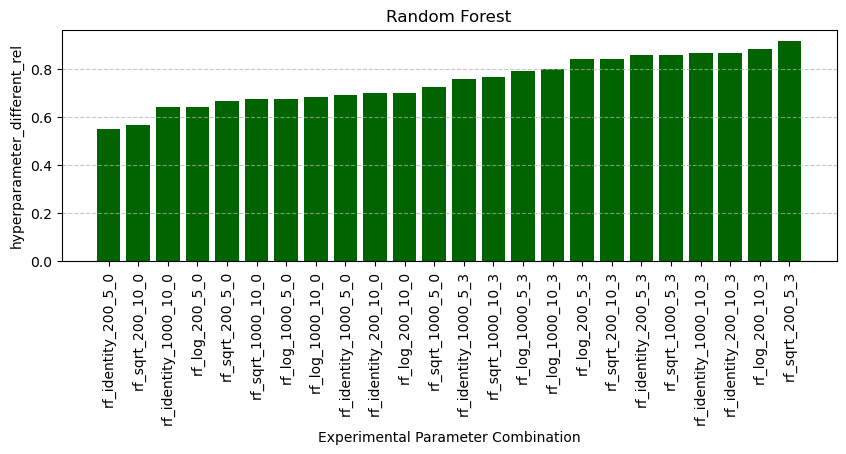

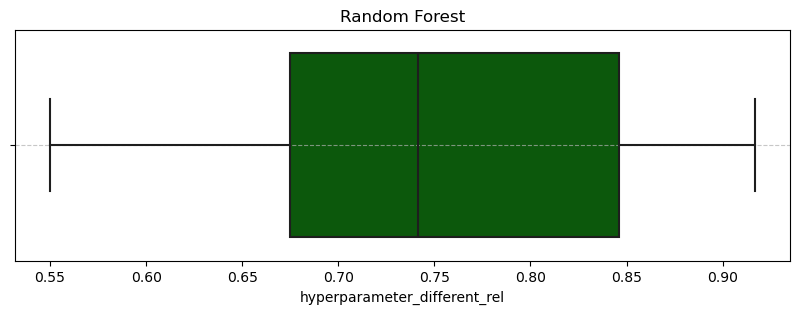

count    24.000000
mean      0.748611
std       0.103492
min       0.550000
25%       0.675000
50%       0.741667
75%       0.845833
max       0.916667
Name: hyperparameter_different_rel, dtype: float64

In [15]:
stats_hyperparameter_different_rel = barplot_one_var(df, 'hyperparameter_different_rel', model_name)
stats_hyperparameter_different_rel

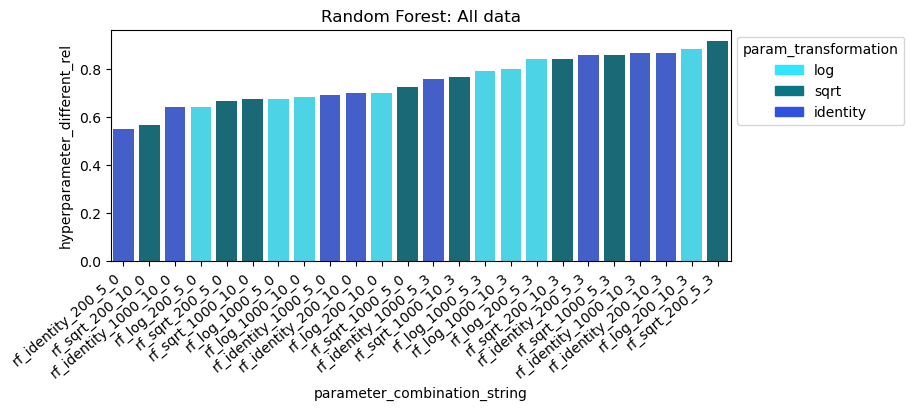

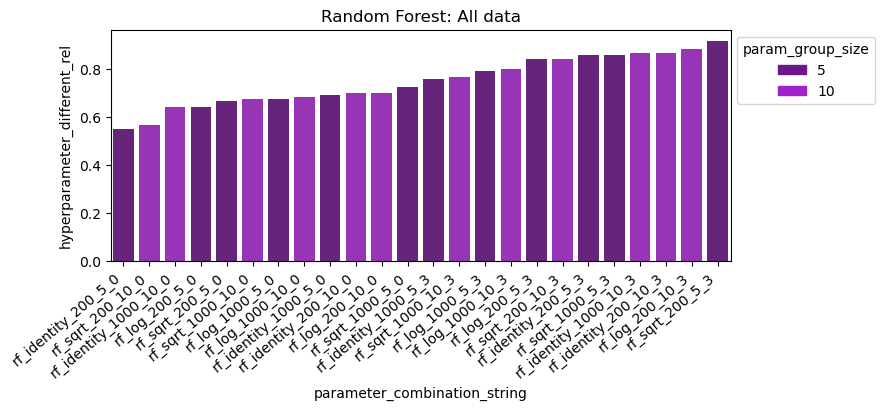

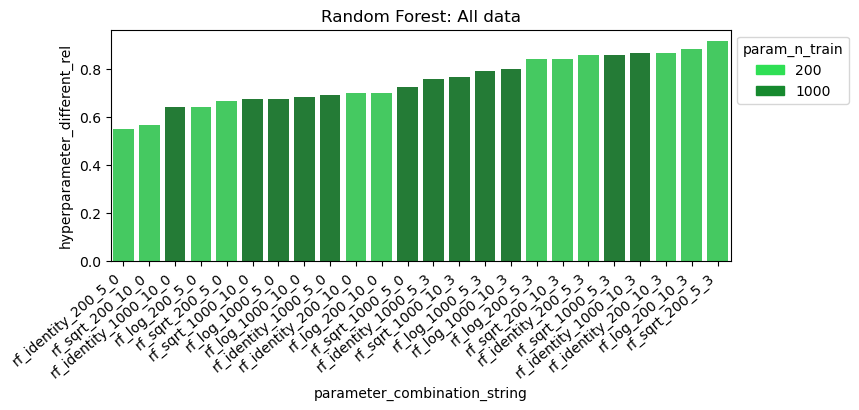

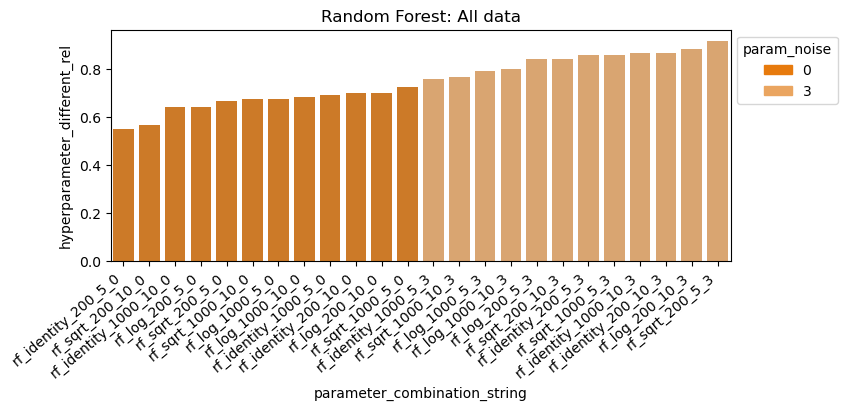

In [16]:
experimental_parameters = ['param_transformation', 'param_group_size', 'param_n_train', 'param_noise']
for param in experimental_parameters:
    barplot_coloured_by_parameter(data = df, experimental_parameter = param, variable_y = 'hyperparameter_different_rel', title = model_name + ': All data')

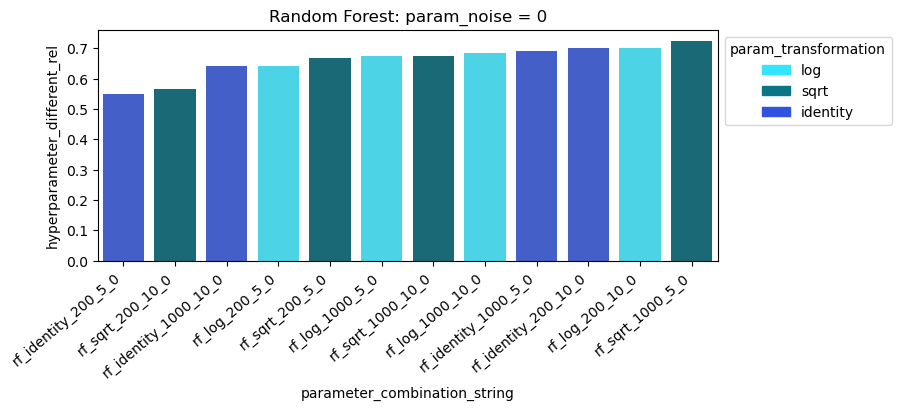

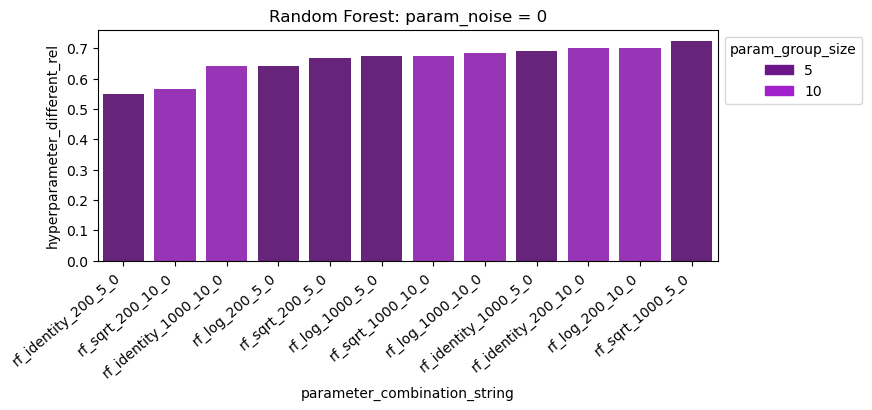

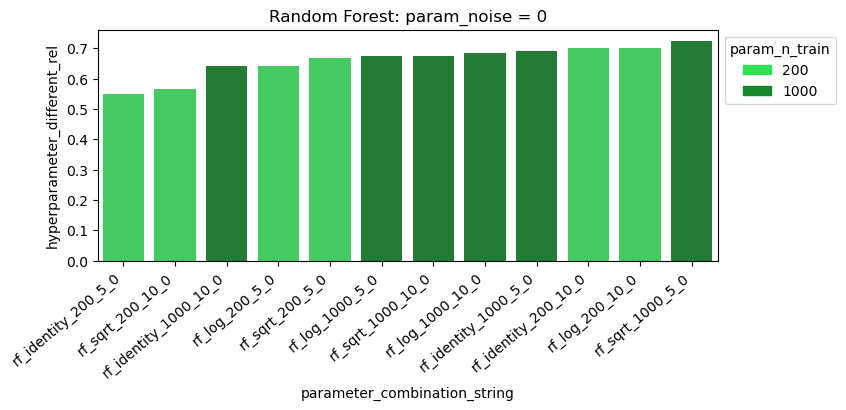

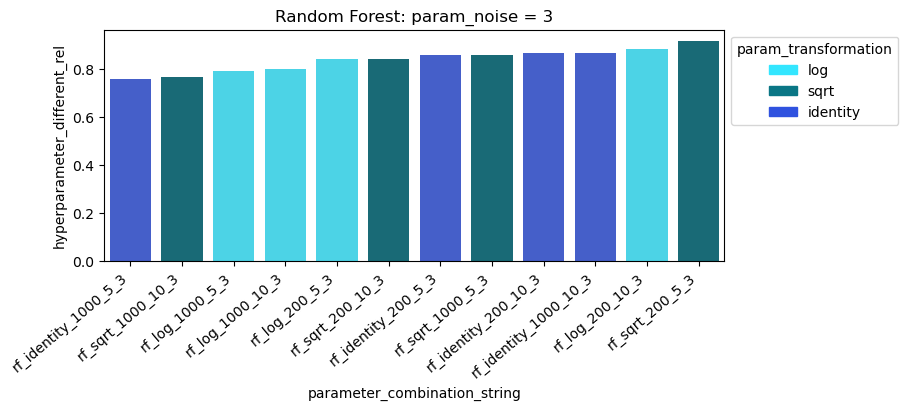

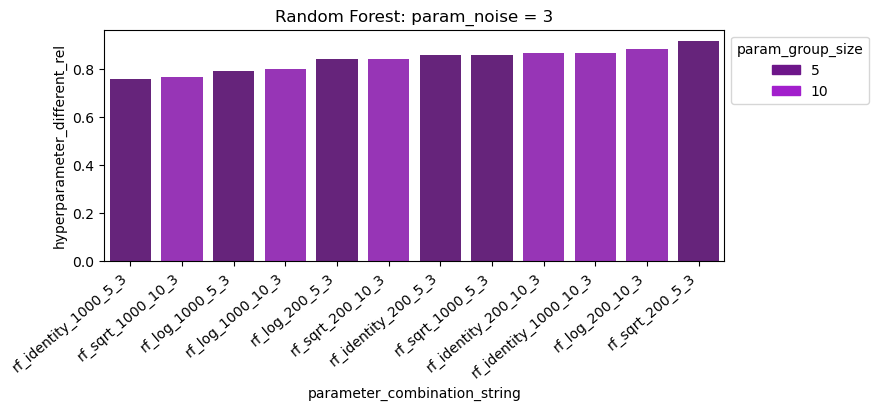

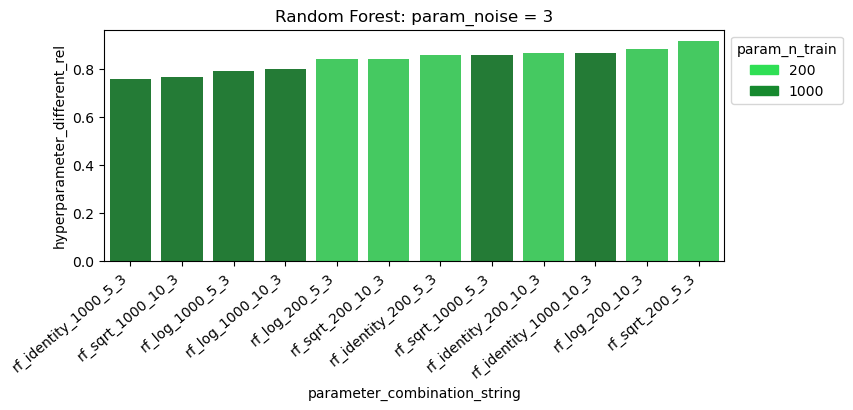

In [17]:
experimental_parameters = ['param_transformation', 'param_group_size', 'param_n_train']
df_noise_0 = df[df['param_noise'] == 0]

for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_noise_0, experimental_parameter = experimental_parameter, variable_y = 'hyperparameter_different_rel',  title = model_name + ': param_noise = 0')

df_noise_3 = df[df['param_noise'] == 3]
for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_noise_3, experimental_parameter = experimental_parameter, variable_y = 'hyperparameter_different_rel',  title = model_name + ': param_noise = 3')


# 3. Performance within cross-validation
#### RandomSearch_Mean_Val_MSE_diff
* Defined as : RandomSearch_Mean_Val_MSE_stratified - RandomSearch_Mean_Val_MSE_unstratified
* Stratiifed seems to slightly perform better on validation set
* pattern in n_train: for more data smaller MSE on validaton data

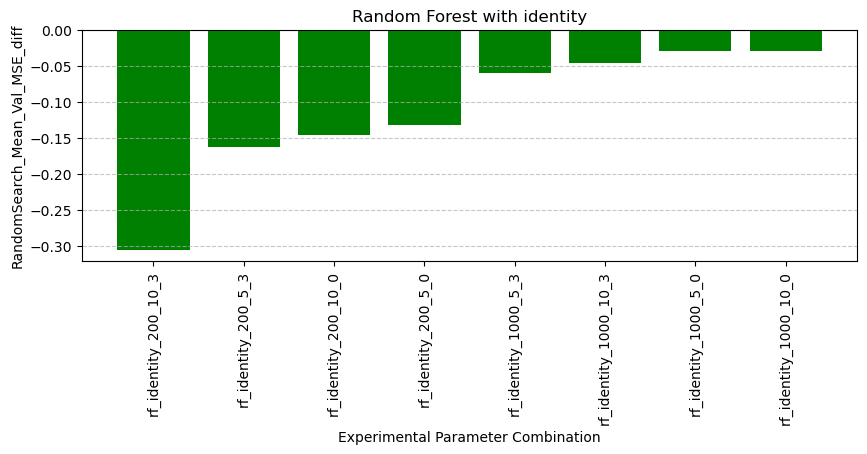

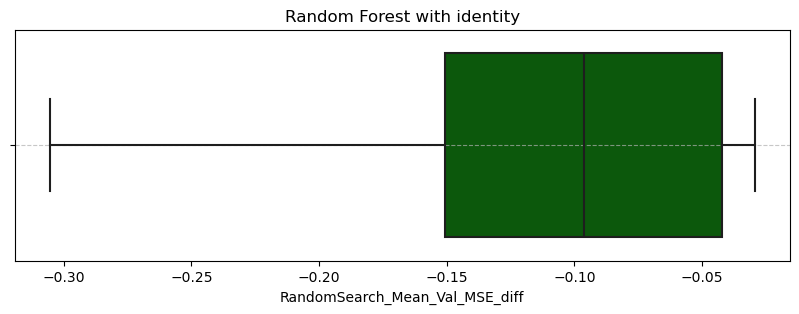

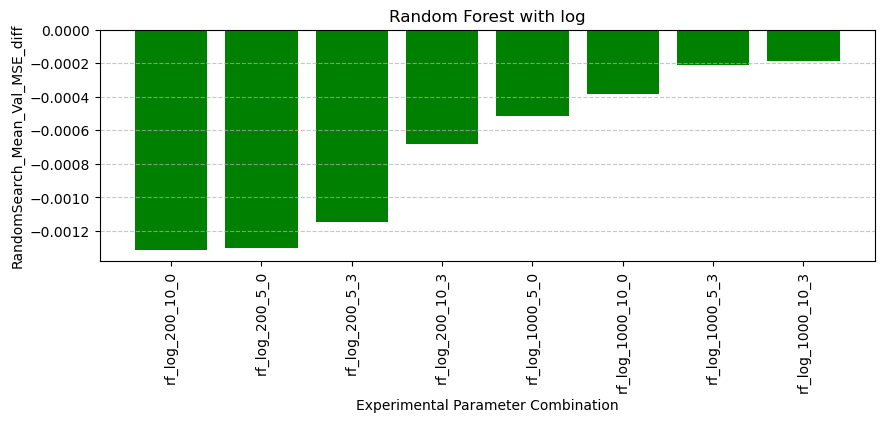

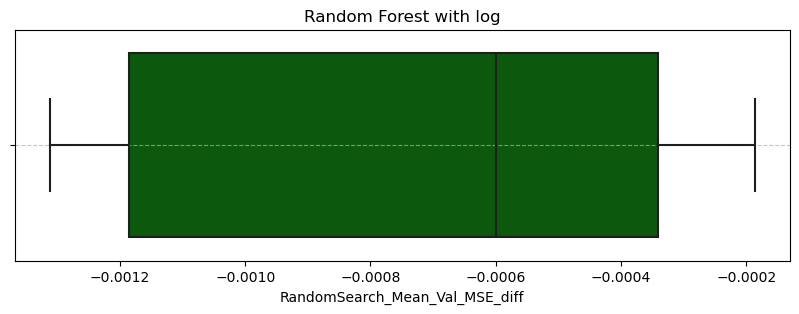

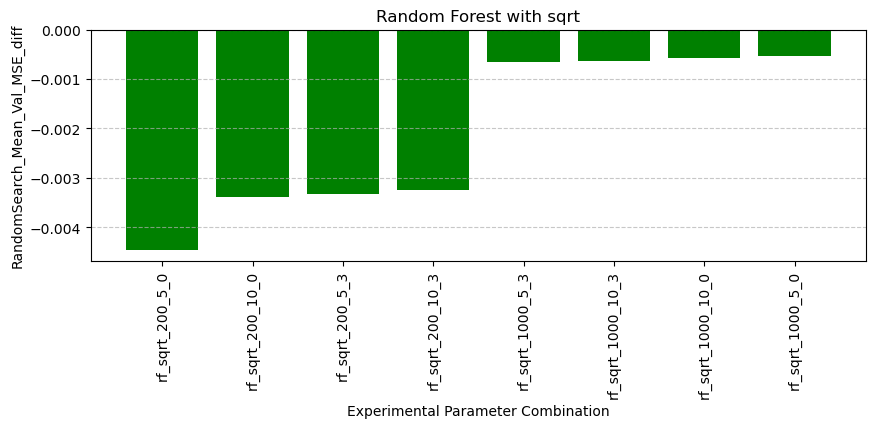

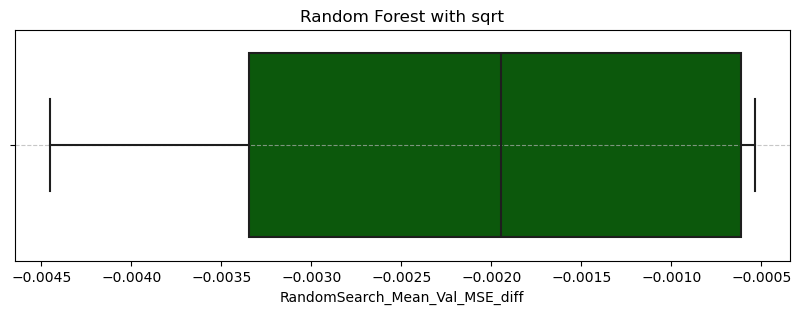

In [ ]:
transformations = df['param_transformation'].unique()

for tranfrom in transformations:
    df_transformation = df[df['param_transformation'] == tranfrom]
    _ = barplot_one_var(df_transformation, 'RandomSearch_Mean_Val_MSE_diff', title= model_name + ' with ' + tranfrom)

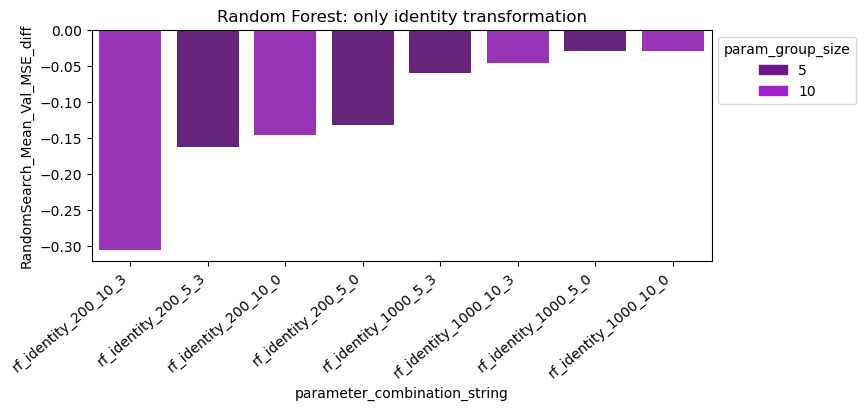

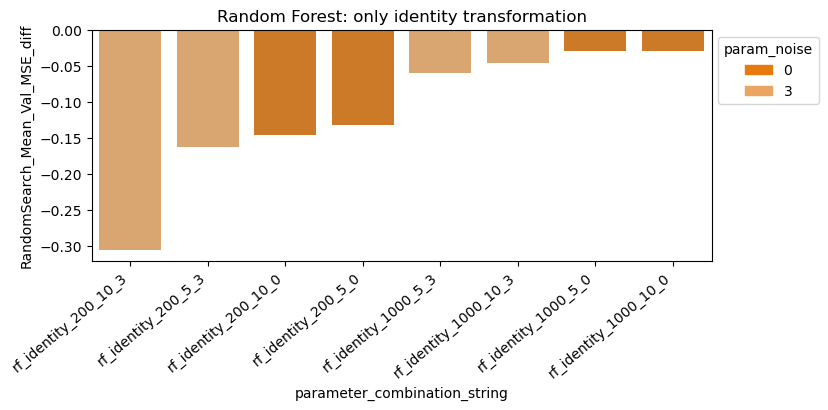

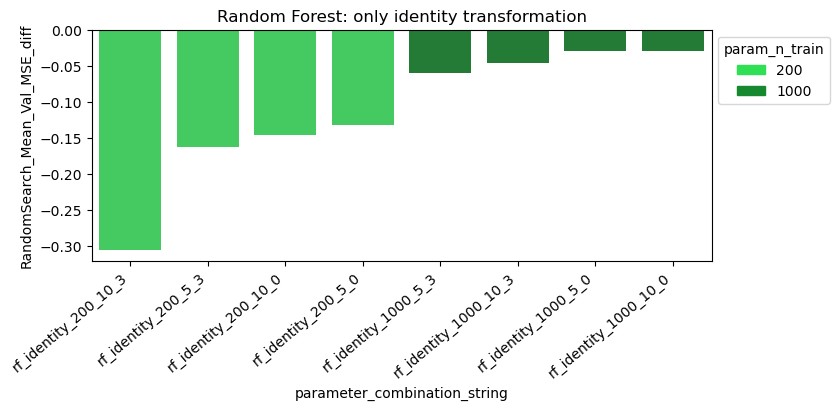

In [ ]:
experimental_parameters = ['param_group_size', 'param_noise', 'param_n_train']
df_noise_identity= df[df['param_transformation'] == 'identity']

for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_noise_identity, experimental_parameter = experimental_parameter, variable_y = 'RandomSearch_Mean_Val_MSE_diff', title = model_name + ': only identity transformation')


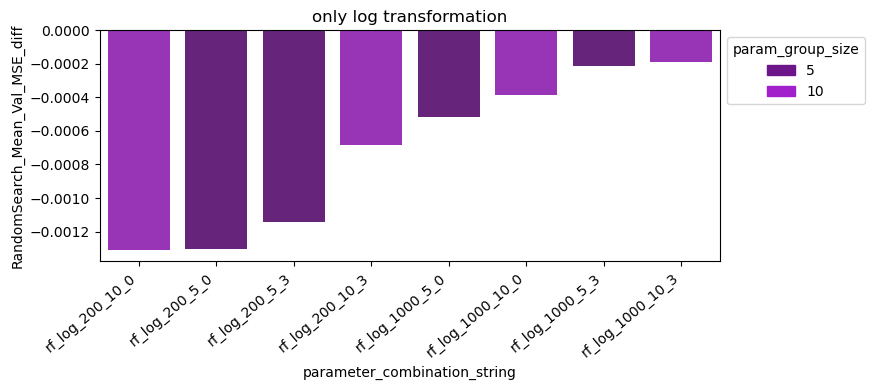

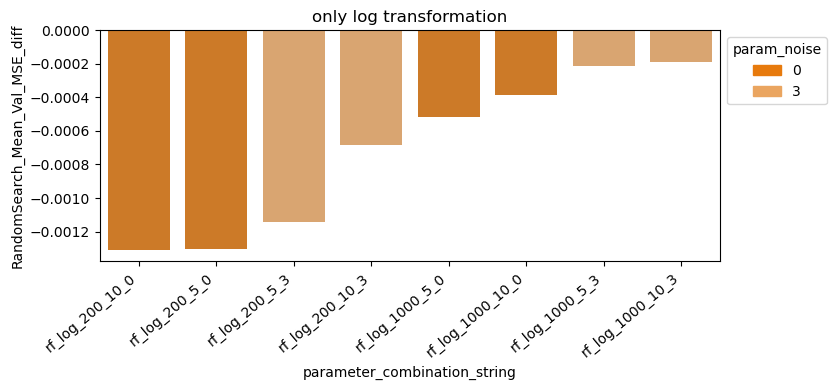

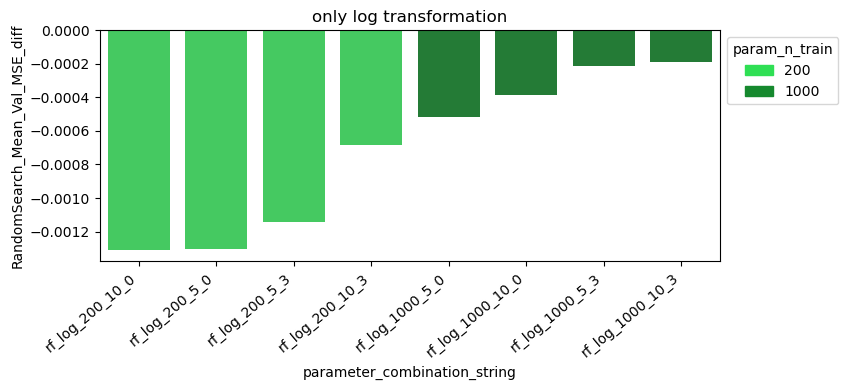

In [ ]:
experimental_parameters = ['param_group_size', 'param_noise', 'param_n_train']
df_noise_identity= df[df['param_transformation'] == 'log']

for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_noise_identity, experimental_parameter = experimental_parameter, variable_y = 'RandomSearch_Mean_Val_MSE_diff', title = 'only log transformation')


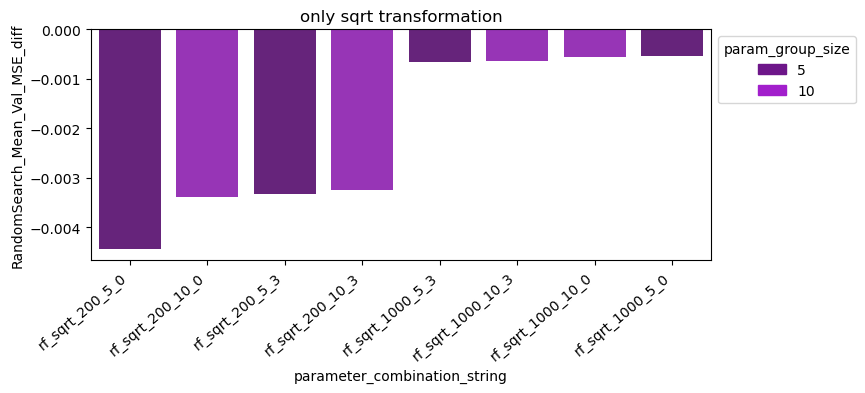

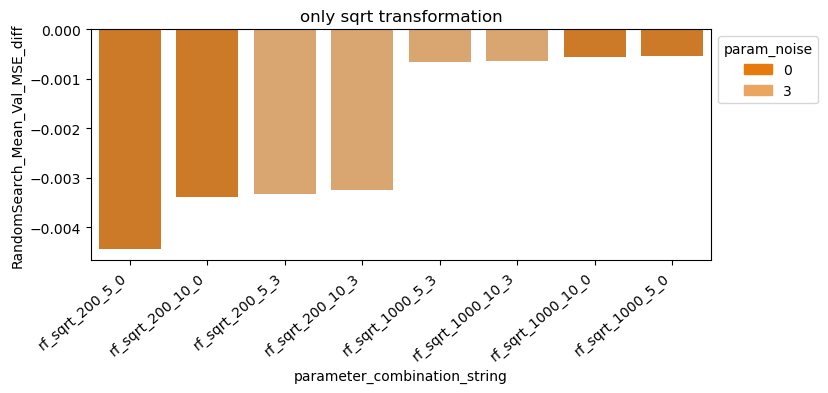

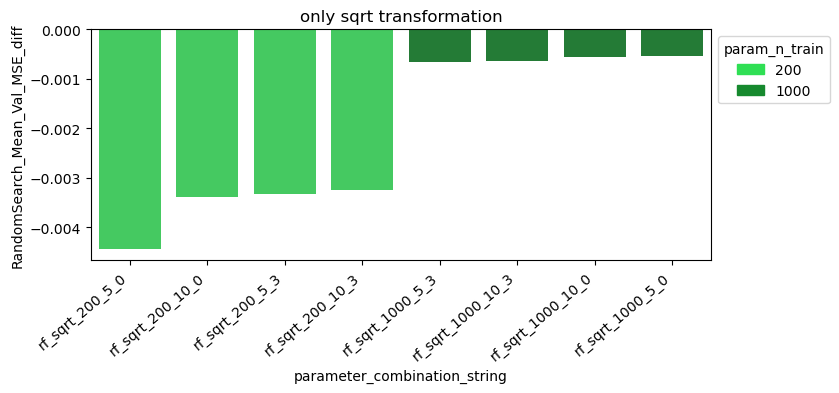

In [ ]:
experimental_parameters = ['param_group_size', 'param_noise', 'param_n_train']
df_noise_identity= df[df['param_transformation'] == 'sqrt']

for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_noise_identity, experimental_parameter = experimental_parameter, variable_y = 'RandomSearch_Mean_Val_MSE_diff', title = 'only sqrt transformation')


## RandomSearch_Mean_Val_SD_unstratified

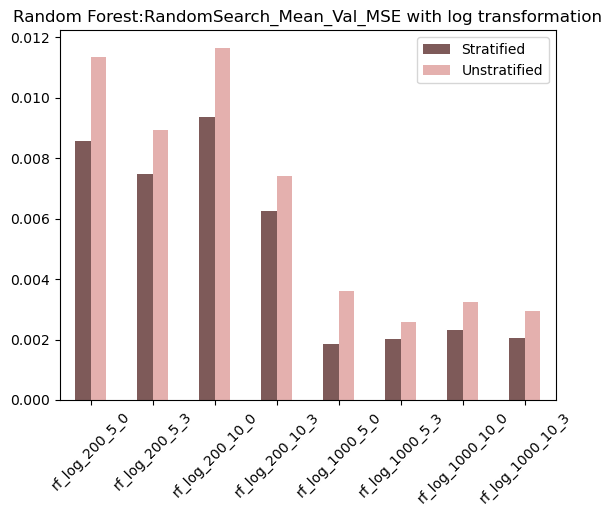

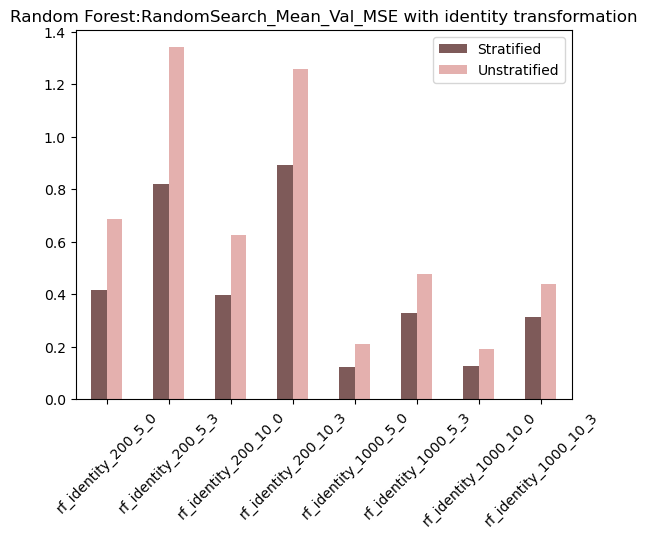

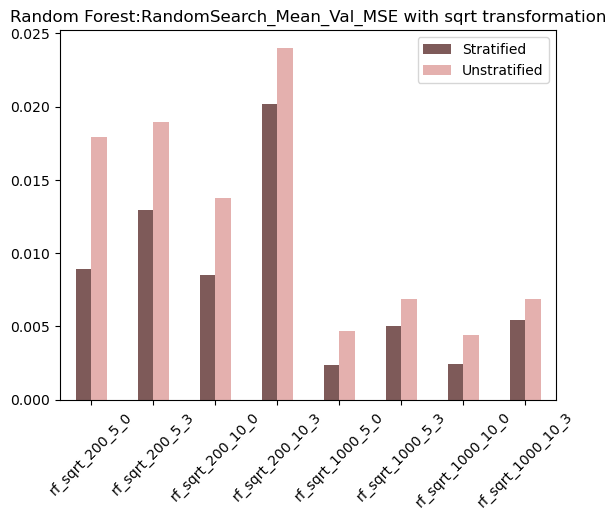

In [ ]:
experimental_parameters = ['param_group_size', 'param_noise', 'param_n_train']
for transformation in ['log', 'identity', 'sqrt']:
    df_transfromation = df[df['param_transformation'] == transformation]

    df_plot = pd.DataFrame({'Stratified': df_transfromation['RandomSearch_Mean_Val_SD_stratified'].values,
                            'Unstratified': df_transfromation['RandomSearch_Mean_Val_SD_unstratified'].values},
                           index=df_transfromation['parameter_combination_string'].values)
    ax = df_plot.plot.bar(rot=0, color={"Stratified": '#7E5A59', "Unstratified": '#E4B0AE'})
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(f'{model_name}:RandomSearch_Mean_Val_MSE with {transformation} transformation')


# 4. Generalisation error
#### error_estimator_error_estimator_mean_stratified
* error_estimator = mean_stratified - mean_unstratified

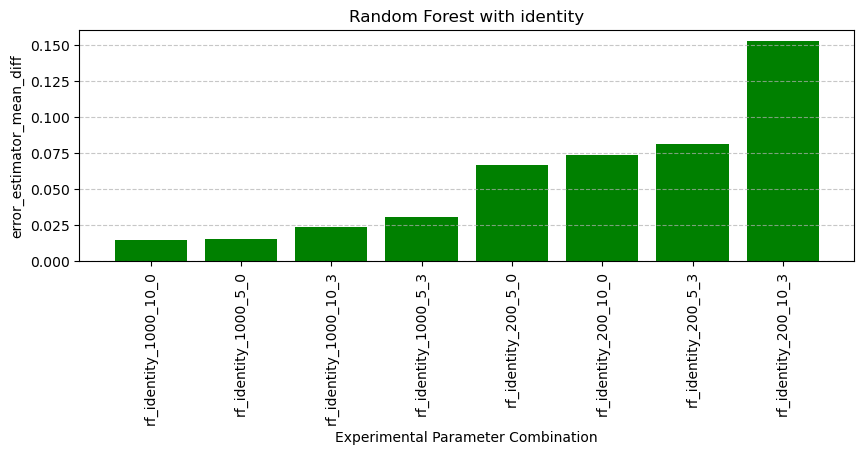

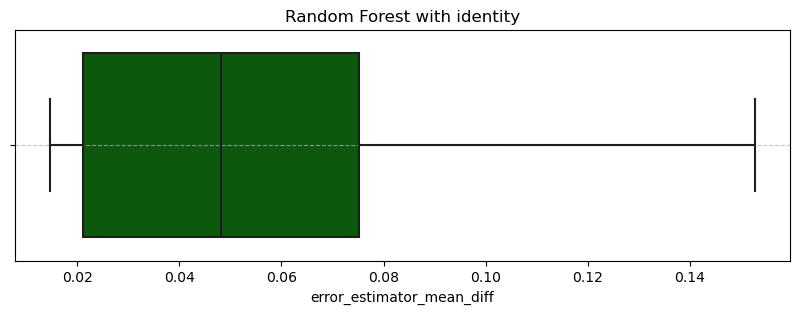

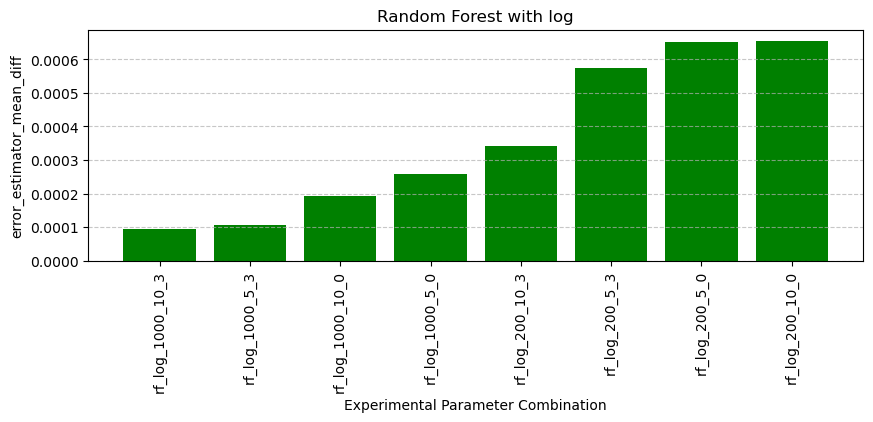

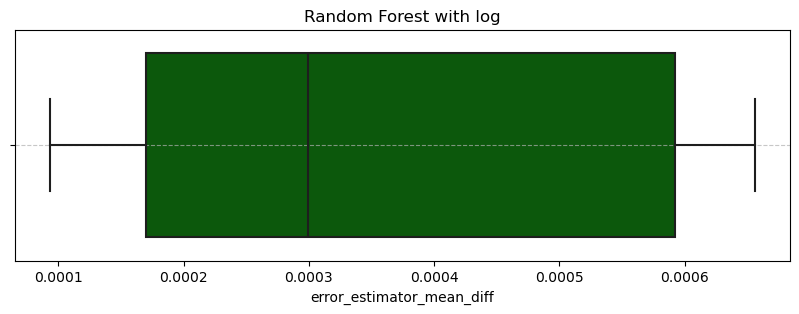

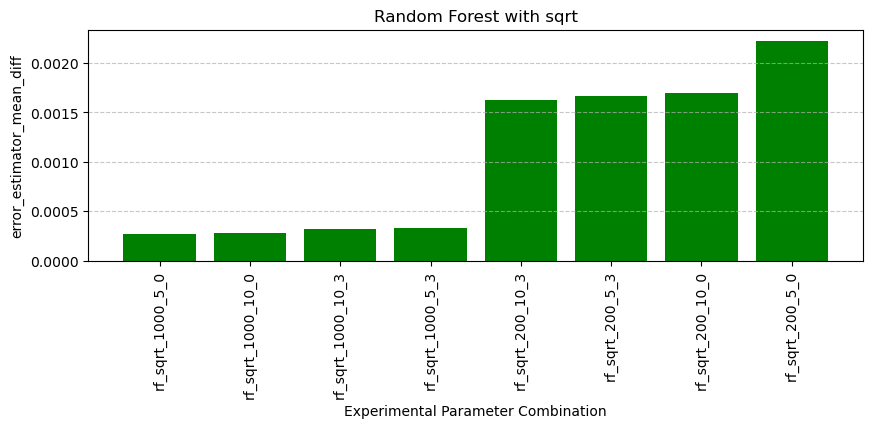

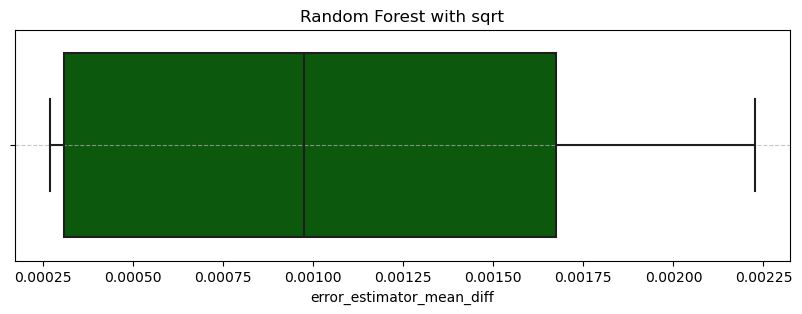

In [ ]:
transformations = df['param_transformation'].unique()

for tranfrom in transformations:
    df_transformation = df[df['param_transformation'] == tranfrom]
    _ = barplot_one_var(df_transformation, 'error_estimator_mean_diff', title= model_name + ' with ' + tranfrom)

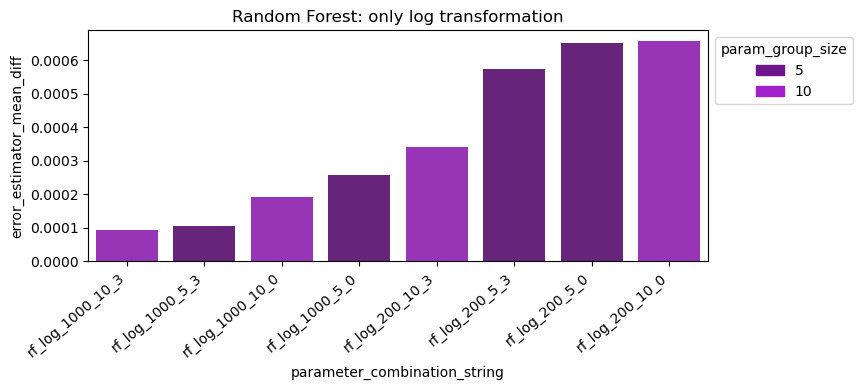

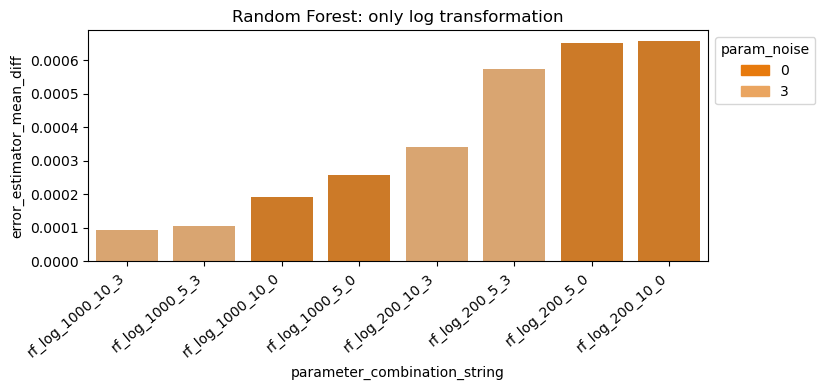

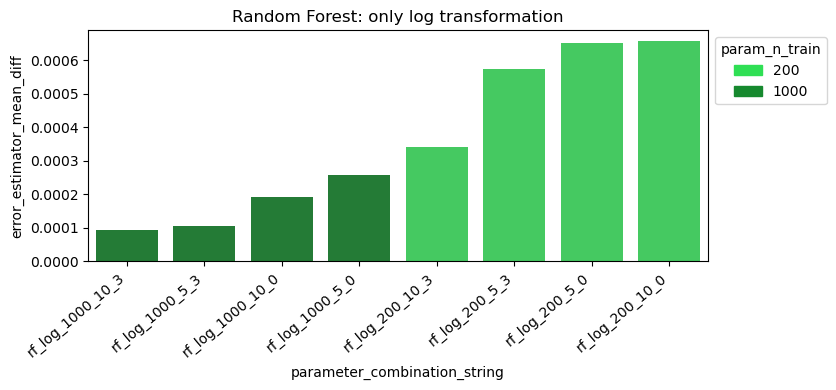

In [ ]:
experimental_parameters = ['param_group_size', 'param_noise', 'param_n_train']
df_transfromation= df[df['param_transformation'] == 'log']

for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_transfromation, experimental_parameter = experimental_parameter, variable_y = 'error_estimator_mean_diff', title = model_name + ': only log transformation')

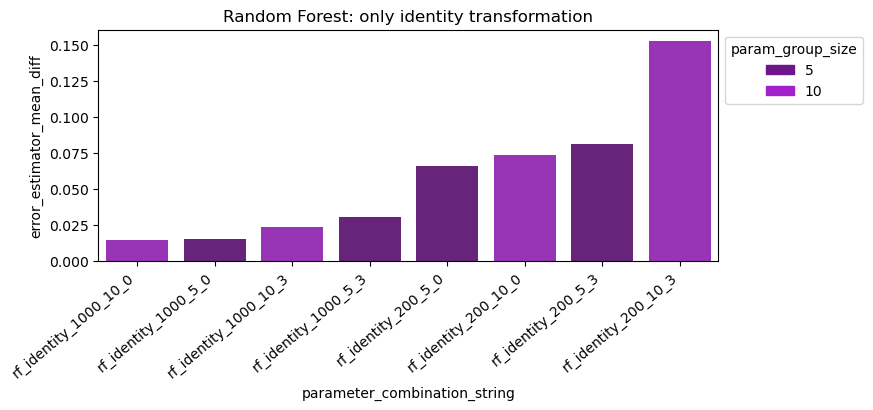

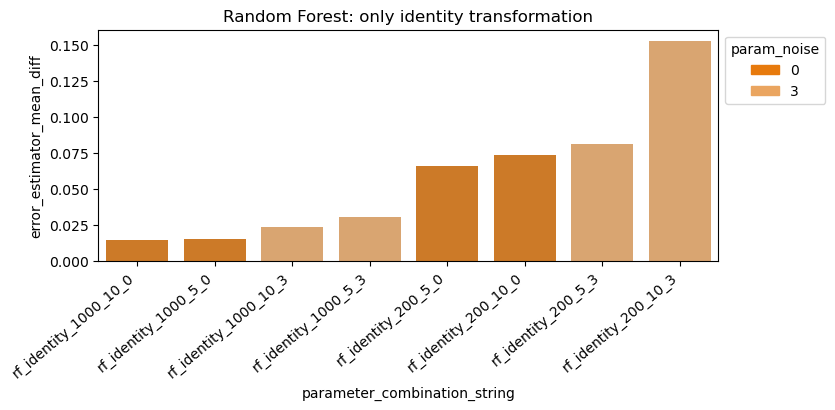

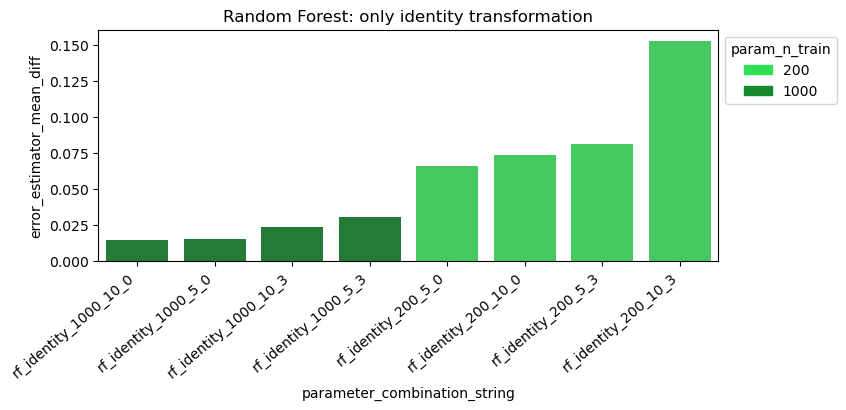

In [ ]:
experimental_parameters = ['param_group_size', 'param_noise', 'param_n_train']
df_transfromation= df[df['param_transformation'] == 'identity']

for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_transfromation, experimental_parameter = experimental_parameter, variable_y = 'error_estimator_mean_diff', title = model_name + ': only identity transformation')

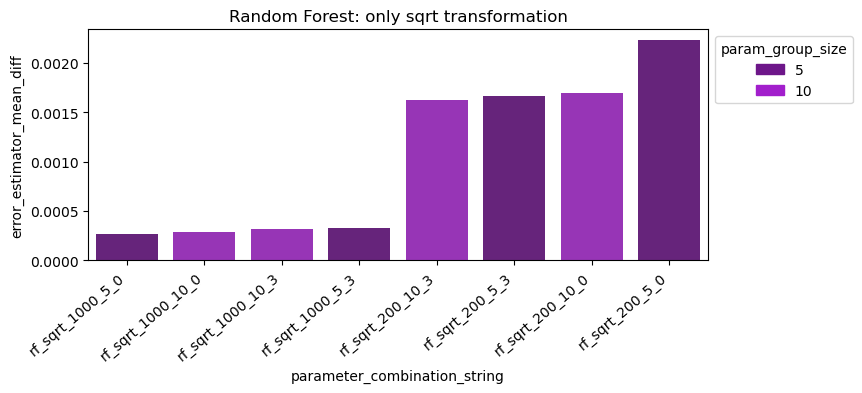

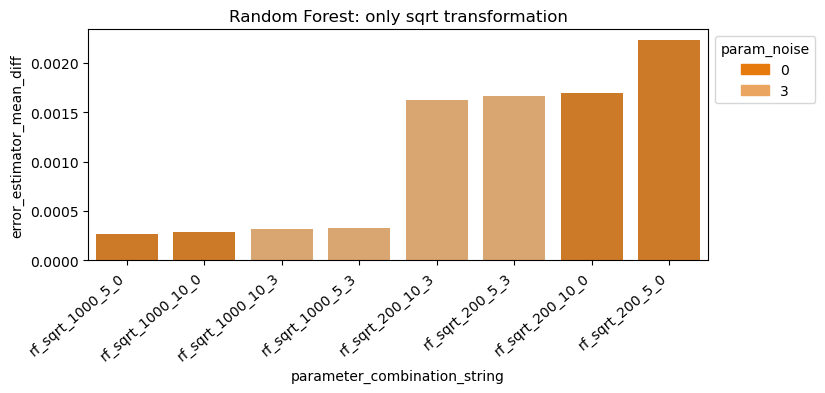

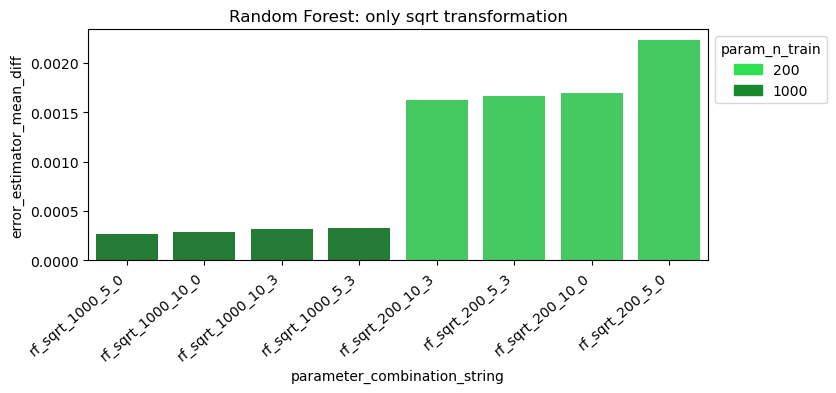

In [ ]:
experimental_parameters = ['param_group_size', 'param_noise', 'param_n_train']
df_transfromation= df[df['param_transformation'] == 'sqrt']

for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_transfromation, experimental_parameter = experimental_parameter, variable_y = 'error_estimator_mean_diff', title = model_name + ': only sqrt transformation')

## error_estimatorerror_estimator_sd_stratified

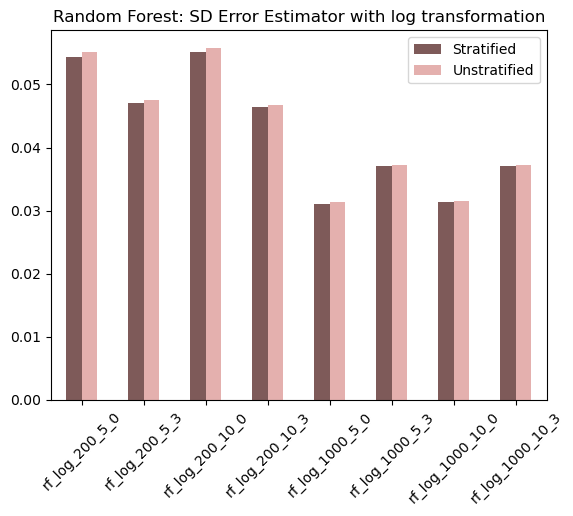

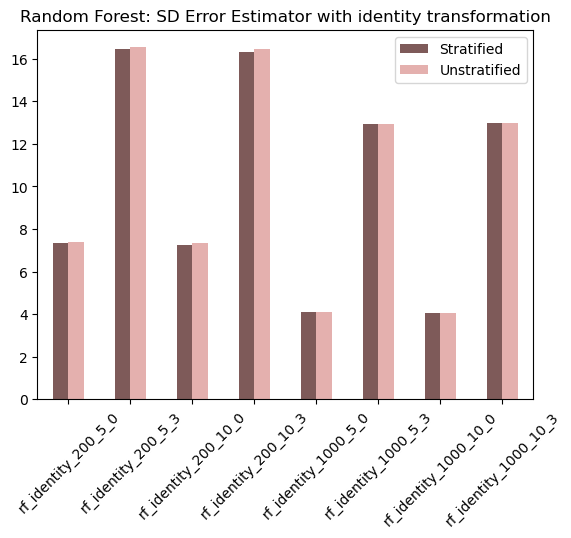

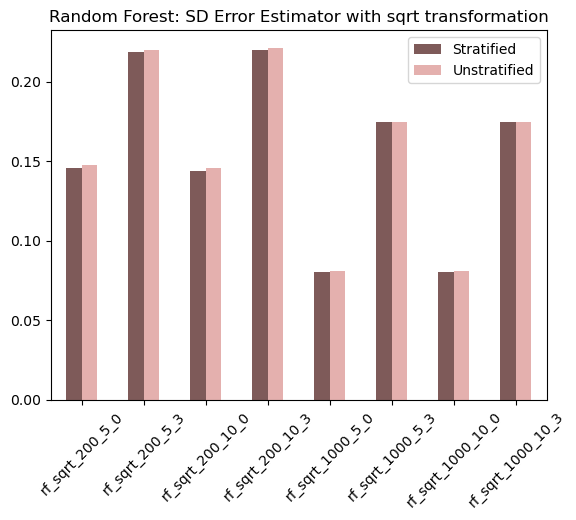

In [ ]:
experimental_parameters = ['param_group_size', 'param_noise', 'param_n_train']
for transformation in ['log', 'identity', 'sqrt']:
    df_transfromation = df[df['param_transformation'] == transformation]

    df_plot = pd.DataFrame({'Stratified': df_transfromation['error_estimator_sd_stratified'].values,
                            'Unstratified': df_transfromation['error_estimator_sd_unstratified'].values},
                           index=df_transfromation['parameter_combination_string'].values)
    ax = df_plot.plot.bar(rot=0, color={"Stratified": '#7E5A59', "Unstratified": '#E4B0AE'})
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(f'{model_name}: SD Error Estimator with {transformation} transformation')


# 5. Descreptives in Cross-validation

#### val_train_descriptives_intersection_area_mean_diff
Same as in Random Forest as it has nothing to do with model itself

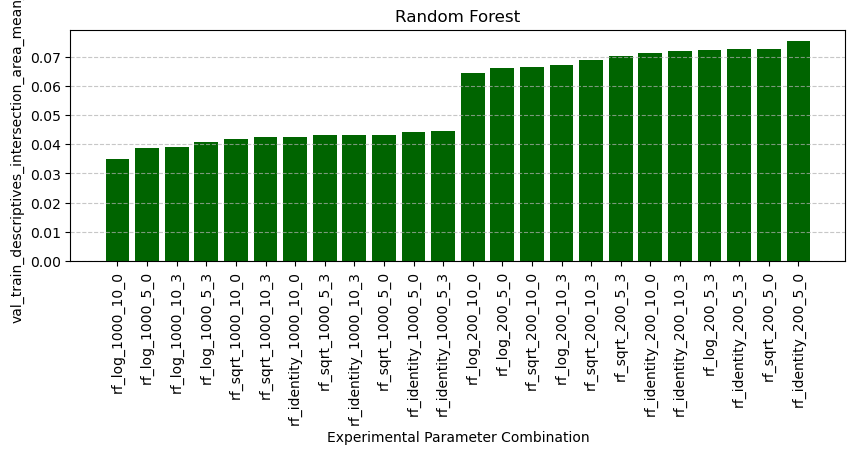

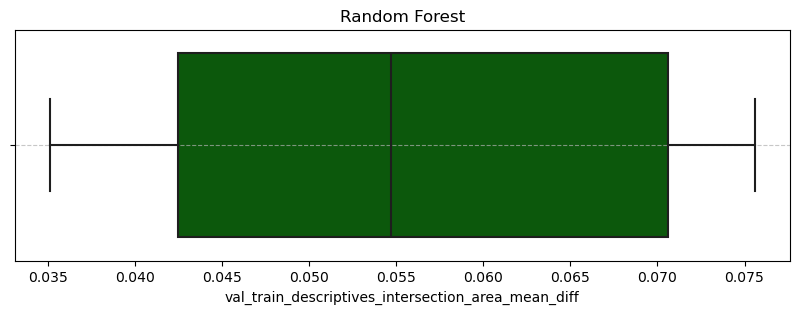

In [18]:
stats_hyperparameter_different_rel = barplot_one_var(df, 'val_train_descriptives_intersection_area_mean_diff', model_name)

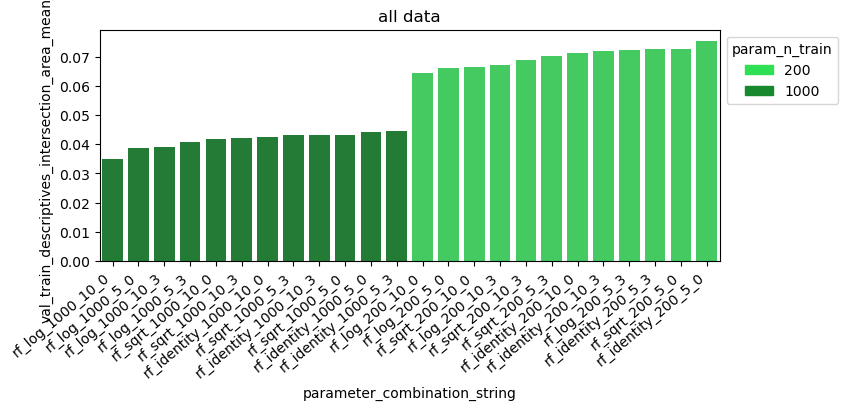

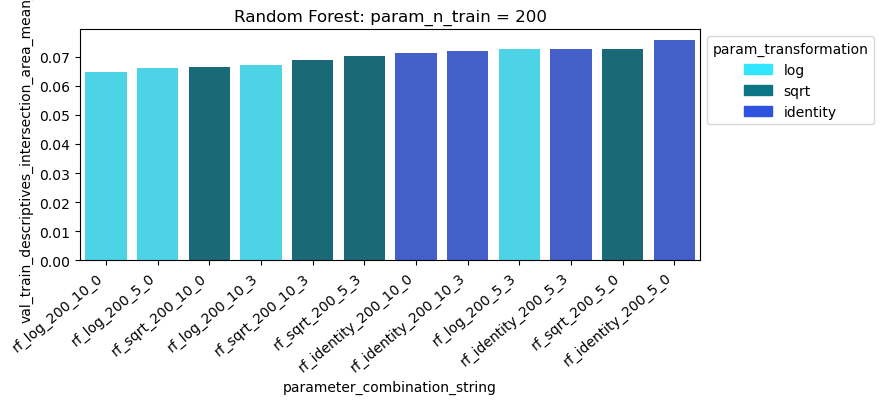

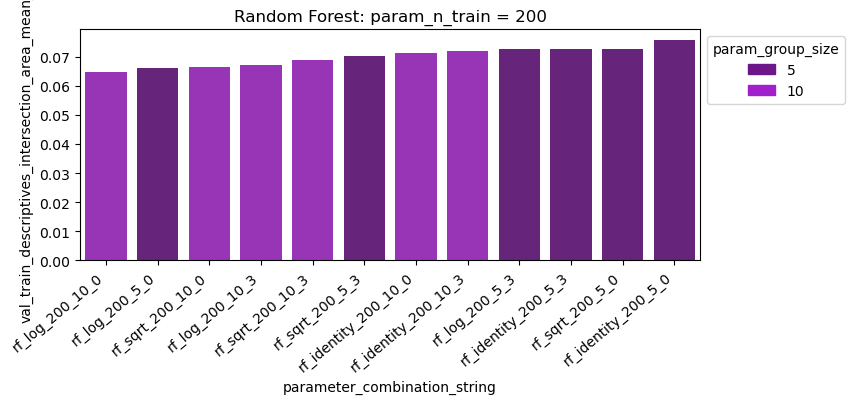

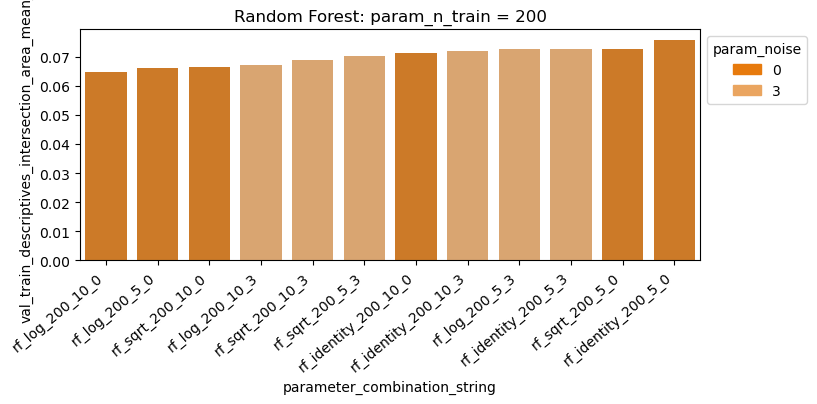

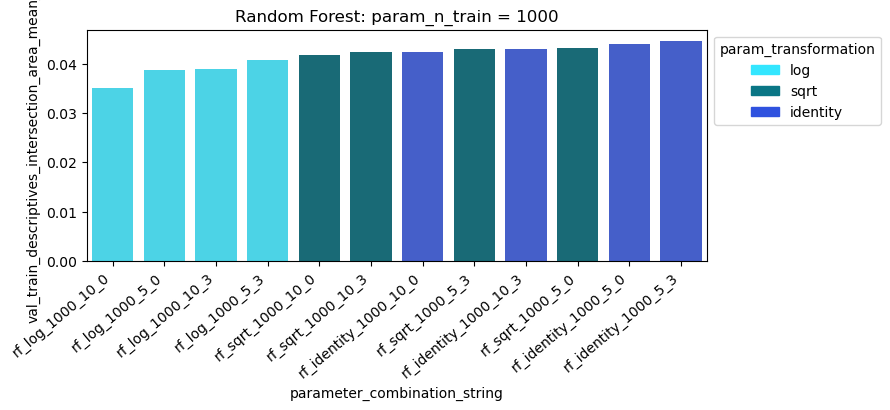

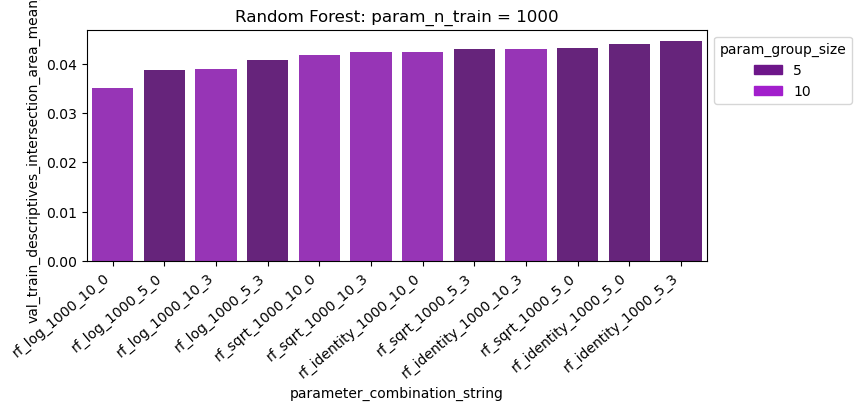

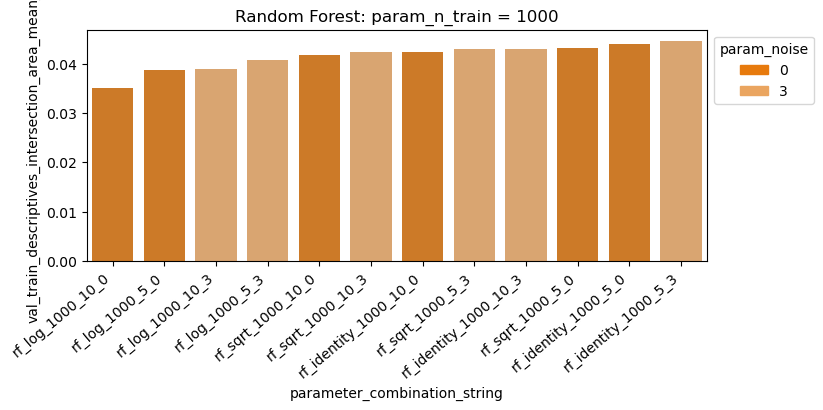

In [19]:
barplot_coloured_by_parameter(data = df, experimental_parameter = 'param_n_train', variable_y = 'val_train_descriptives_intersection_area_mean_diff', title = 'all data')
experimental_parameters = ['param_transformation', 'param_group_size', 'param_noise']

df_noise_200 = df[df['param_n_train'] == 200]
for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_noise_200, experimental_parameter = experimental_parameter, variable_y = 'val_train_descriptives_intersection_area_mean_diff', title = model_name + ': param_n_train = 200')

df_noise_1000 = df[df['param_n_train'] == 1000]
for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_noise_1000, experimental_parameter = experimental_parameter, variable_y = 'val_train_descriptives_intersection_area_mean_diff', title = model_name + ': param_n_train = 1000')
